In [1]:
from graphviz import Digraph
from math import inf

"""
Below, (inf) denotes paths that are not present between two vertices in a directed graph
The values of each cell are the weight between the origin along left, and the destination along top
Each vertex will be known by its index and both left and top have a 1:1 correspondence
"""

adjacency_matrix = [
    [0,   inf, 6,   3,   inf],
    [3,   0,   inf, inf, inf],
    [inf, inf, 0,   2,   inf],
    [inf, 1,   1,   0,   inf],
    [inf, 4,   inf, 2,   0  ]]

vertices_count = len(adjacency_matrix)
try:
    for row in adjacency_matrix:
        assert len(row) == vertices_count
except AssertionError:
    print("The matrix must be n*n")

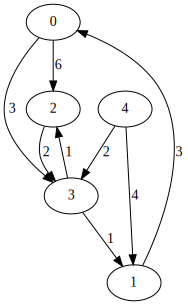

In [2]:
# Visualise the graph
graph = Digraph('G')

for i in range(vertices_count):
    graph.node(str(i))

for i, origin in enumerate(adjacency_matrix):
    for j, weight in enumerate(origin):
        if weight not in [0, inf]:
            graph.edge(str(i),str(j),str(weight))

graph

In [3]:
def disp_matrix(adjacency_table, description):
    print(description)
    for row in adjacency_table:
        print(row)

In [4]:
# Make two copies of the matrix, but only its values, not the references
intermediate_matrix_A = []
intermediate_matrix_B = []
for row in adjacency_matrix:
    intermediate_matrix_A.append(list(row))
    intermediate_matrix_B.append(list(row))
    
intermediate_matrix_A
intermediate_matrix_B

[[0, inf, 6, 3, inf],
 [3, 0, inf, inf, inf],
 [inf, inf, 0, 2, inf],
 [inf, 1, 1, 0, inf],
 [inf, 4, inf, 2, 0]]

In [5]:
"""
Since the the intermediary matrix (A) has vertices arranged in chronological ascending order, then for any
u (origin)
v (destination)
the k allows for checking the constituent paths between u->v.
For k=0, the first row k+1 (from 1 to v) and first column, (from v to 1) are checked
Then, these shortest paths are assigned to the intermediary matrix (B)
Every loop of k, the first intermediary matrix (A) gets updated with the values of B,
and then A is used again for the next iteration of k[1,2,3,...]
"""

disp_matrix(intermediate_matrix_A, "before k=0")

for k in range(vertices_count):
    for u in range(vertices_count):
        for v in range(vertices_count):
            u_to_kth_v = intermediate_matrix_A[u][k]
            kth_u_to_v = intermediate_matrix_A[k][v]
            sum_of_constituent_paths = u_to_kth_v + kth_u_to_v
            intermediate_matrix_B[u][v] = min(intermediate_matrix_A[u][v], sum_of_constituent_paths)

    disp_matrix(intermediate_matrix_A, "after k={}".format(k))
    intermediate_matrix_A = intermediate_matrix_B

before k=0
[0, inf, 6, 3, inf]
[3, 0, inf, inf, inf]
[inf, inf, 0, 2, inf]
[inf, 1, 1, 0, inf]
[inf, 4, inf, 2, 0]
after k=0
[0, inf, 6, 3, inf]
[3, 0, inf, inf, inf]
[inf, inf, 0, 2, inf]
[inf, 1, 1, 0, inf]
[inf, 4, inf, 2, 0]
after k=1
[0, inf, 6, 3, inf]
[3, 0, 9, 6, inf]
[inf, inf, 0, 2, inf]
[4, 1, 1, 0, inf]
[7, 4, 13, 2, 0]
after k=2
[0, inf, 6, 3, inf]
[3, 0, 9, 6, inf]
[inf, inf, 0, 2, inf]
[4, 1, 1, 0, inf]
[7, 4, 13, 2, 0]
after k=3
[0, 4, 4, 3, inf]
[3, 0, 7, 6, inf]
[6, 3, 0, 2, inf]
[4, 1, 1, 0, inf]
[6, 3, 3, 2, 0]
after k=4
[0, 4, 4, 3, inf]
[3, 0, 7, 6, inf]
[6, 3, 0, 2, inf]
[4, 1, 1, 0, inf]
[6, 3, 3, 2, 0]


In [ ]:
# TO DO, IMPLEMENT PATH RECONSTRUCTION. NOT SURE HOW. PREDECESSOR MATRICES, PERHAPS
# https://web.mit.edu/urban_or_book/www/book/chapter6/6.2.2.html